<a href="https://colab.research.google.com/github/dangtrantrung/Tuning---HyperParameter-Optimization-with-Grid-Search-Keras-Tuner/blob/master/Tuning_HyperParameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WorkFlow
## 1. Load Data
## 2. Build Hyper Model with Hyper Parameters
## 3. Select Tuner/Grid Search
## 4. Train Model with Data
## 5. Build model with Best HP
## 6. Tuning to get best HP

In [1]:

!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.2 MB/s eta 0:00:00


In [2]:

import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [3]:
# import data

(img_train,label_train),(img_test, label_test) = keras.datasets.fashion_mnist.load_data()
# Normalize
img_train=img_train.astype('float32')/255
img_test=img_test.astype('float32')/255

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
label_train[8]

5

In [5]:
# build Model HP
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  X = hp.Int("units", min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=X, activation="relu"))
  model.add(keras.layers.Dense(10))

  lr = hp.Choice("lr",values=[1e-2,1e-3,1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
  return model



In [6]:
!rm rf /content/tuner_dir_01
tuner = kt.Hyperband (model_builder, objective="val_accuracy", directory="tuner_dir_01", project_name="Demo_Tuner_01")

# Keras Callbacks - Early Stop
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)



rm: cannot remove 'rf': No such file or directory
rm: cannot remove '/content/tuner_dir_01': No such file or directory


In [7]:
tuner.search( img_train, label_train, validation_split=0.2, callbacks=[stop_early])


Trial 47 Complete [00h 00m 12s]
val_accuracy: 0.8535833358764648

Best val_accuracy So Far: 0.8723333477973938
Total elapsed time: 00h 10m 44s


In [8]:
best_hps = tuner.get_best_hyperparameters()[0]

print("Best units = ",best_hps.get('units'),"optimal learning rate = ", best_hps.get('lr'))

Best units =  416 optimal learning rate =  0.001


In [9]:
# build Model from best HP
best_model=tuner.hypermodel.build(best_hps)
best_model.fit(img_train,label_train,epochs=20,validation_split=0.2)
best_model.save('model.h5')

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4960 - accuracy: 0.8240 - val_loss: 0.3934 - val_accuracy: 0.8584
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3705 - accuracy: 0.8645 - val_loss: 0.3793 - val_accuracy: 0.8637
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3308 - accuracy: 0.8785 - val_loss: 0.3659 - val_accuracy: 0.8692
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3045 - accuracy: 0.8864 - val_loss: 0.3538 - val_accuracy: 0.8669
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2867 - accuracy: 0.8930 - val_loss: 0.3452 - val_accuracy: 0.8727
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.9004 - val_loss: 0.3115 - val_accuracy: 0.8883
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2554 - accuracy: 0.9047 - val_loss: 0.3083 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# get best model from tuner
best_model=tuner.get_best_models()[0]
best_model.build(img_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 416)               326560    
                                                                 
 dense_1 (Dense)             (None, 10)                4170      
                                                                 
Total params: 330730 (1.26 MB)
Trainable params: 330730 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 2. More Complex Networks
def model_builder(hp):

  model = tf.keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  X1 = hp.Int("unit1", min_value=32, max_value=512, step=32)
  X2 = hp.Int("unit2", min_value=32, max_value=1024, step=32)
  X3 = hp.Int("unit3", min_value=32, max_value=256, step=32)
  Y = hp.Float("dr_value", min_value=0.2, max_value=0.3, step=0.05) #0.2-0.3

  model.add(keras.layers.Dense(units=X1, activation="relu"))
  model.add(keras.layers.Dense(units=X2, activation="relu"))
  model.add(keras.layers.Dropout(Y))
  model.add(keras.layers.Dense(units=X3, activation="relu"))
  model.add(keras.layers.Dense(10))

  lr = 0.001

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
  return model

# GridSearch with SVM

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC


In [15]:
# Explore Breast Cancer Data
cancer = load_breast_cancer()

In [17]:
df_feat = pd.DataFrame(cancer['data'],
					columns = cancer['feature_names'])
df_target = pd.DataFrame(cancer['target'],
					columns =['Cancer'])

print("Feature Variables: ")
print(df_feat.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

In [18]:
df_feat.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
						df_feat, np.ravel(df_target),
				test_size = 0.30, random_state = 101)


In [21]:
# train the model
model = SVC()
model.fit(X_train, y_train)

# Print accuracy score
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [22]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid=GridSearchCV(SVC(), param_grid, refit=True)


In [23]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [24]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [26]:
model = grid.best_estimator_

In [30]:
# predict
grid_predictions = model.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [31]:
grid_predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

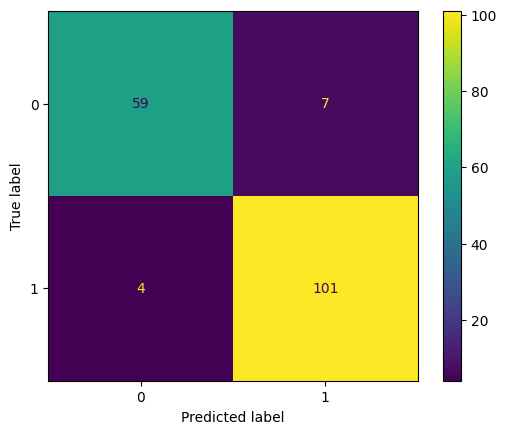

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, grid_predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()